In [33]:
import os
import sys

# Check if running in Google Colab
if 'google.colab' in str(get_ipython()):    
    !git clone https://github.com/kilometersvi/EnergySymbolicRegression.git
    os.chdir("/content/EnergySymbolicRegression/src/energysymbolicregression/")
else:
    os.chdir('../')

# Add to sys.path
sys.path.append(os.getcwd())


Current Directory: /Users/studentloaner/Documents/MilesMilosevich/CPSC354/EnergySymbolicRegression/src/energysymbolicregression


In [35]:
import numpy as np
import re
import math
from model.symreg import H_SymReg
from model.optimizer import *
from model.loss import EvaluatorBase
from model.qfuncts import math_qfuncs, math_ifuncs


In [27]:
def cleanfunct(V: np.ndarray = None, expr: str = None) -> str:

    if expr is not None:
        # Replace sequences of zeros with a single zero
        expr = re.sub(r'(^0+|(?<=[+\-/*])0+)(?=$|[+\-/*x1-9])', '0', expr)

        # Remove unnecessary leading zeros from numbers
        expr = re.sub(r'^|(?<=[+\-/*])(0+)(?=[1-9])', '', expr)

        # Remove empty char
        expr = expr.replace('N','')

        return expr

    return None


class MathEvaluator_ValueAt(EvaluatorBase):
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def forward(self, expr: str, globals: dict = None, locals: dict = None) -> str:
        # 5x -> (5 * x)
        c_eq = re.sub(r'(\d+)x', r'(\1 * x)', expr)

        local_vars = {"x": self.x, "math": math}
        try:
            y_o = eval(c_eq, {}, local_vars)
        except Exception as e:
            #print(f"{c_iter}: Failed to evaluate expression {c_eq}. Error: {e}.")
            return None

        return y_o, self.y




0: NNNNNNNNNN
4: NNNNNNNNNN
8: NNNNNNNNNN
12: NNNNNNNNNN
16: NNNNNNNNxN
20: NNNNNNNNxN
24: NNNNNN2NxN
28: NNNNN8NNxN
32: NNNNN82NxN
36: NNNNN8NNxN
40: NNNNN82NxN
44: NNNNN826xN
48: NNNNN8NNxN
52: NNNNN8NNxN
56: NNNNN82NxN
60: NNNNN8NNxN
64: NNNNN88NxN
68: NNNNN8NNxN
72: NNNNN8NNxN
76: NNNNNN8NxN
80: NNNNNN8NxN
84: NNNNN8NNxN
88: NNNNNNNNxN
92: NNNNNNN0xN
96: NNNNNNN0xN
100: NNNNNN/0xN
104: NNNNNN/0xN
108: NNNNN8*0x*
112: NNNNN8N0xN
116: NNNNN8/0xN
120: NNNNN8/0x*
124: NNNNN8/0x*
128: NNNNN8/0xN
132: NNNNN8/0xN
136: NNNNN8/0x*
140: NNNNN8/0x*
144: NNNNN8/0xN
148: NNNNN8/0xN
152: NNNNN8/0xN
156: NNNNN8/0x*
160: NNNNN8/0x*
164: NNNNN8/0xN
168: NNNNN8/0xN
172: NNNNN8/0xN
176: NNNNN8/0x*
180: NNNNN8/0xN
184: NNNNN8/0xN
188: NNNNN8/0xN
192: NNNNN8/0xN
196: NNNNN8/0x*
200: NNNNN8/0xN
204: NNNNN8/0xN
208: NNNNN8/0xN
212: NNNNN8/0x*
216: NNNNN8/0xN
220: NNNNN8/0xN
224: NNNNN8/0xN
228: NNNNN8/0xN
232: NNNNN8/0x*
236: NNNNN8/0xN
240: NNNNN8/0xN
244: NNNNN8/0xN
248: NNNNN8/0x*
252: NNNNN8/0xN
256:

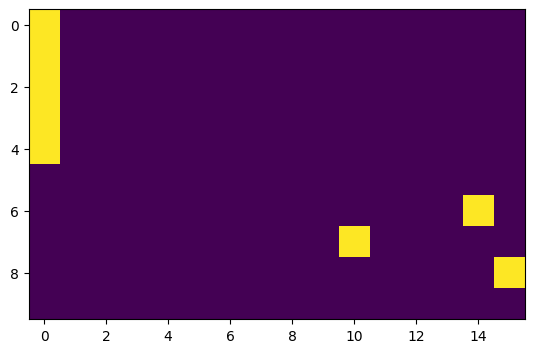

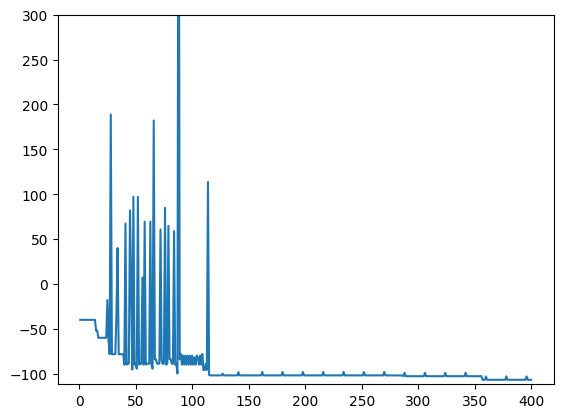

In [28]:
chars = ['N','1','2','3','4','5','6','7','8','9','0','+','-','*','/','x']
max_str_len = 10
conf = {
    "c":-20,
    "ofo":-10,
    "ose":-10,
    "nfn":-0.5,
    "NfNd":7,#
    "Nsd":1,
    "nfx":-10,
    "x":1,
    "xm":-2,
    "Nf!N":-10,
    "Ne":-5,
    "Ns":5,#
    "xfx":-10
}
sets = {
    "operators":[c for c in chars if re.match(r'[^0-9Nxy]', c)],
    "numbers":[c for c in chars if re.match(r'[0-9]', c)]
}

qfuncs = math_qfuncs
ifuncts = math_ifuncs

evaluator = MathEvaluator_ValueAt(2, 20)
eval_clip = 400


    # Compute the loss
    #loss_fn.set_tokenstring_preprocess_function(c)
optimizer = None#MaskedLossOptimizer(std_width = 2, decrease_loss_scaler = 2)


my_sr = H_SymReg(chars=chars, max_str_len=max_str_len, conf=conf, sets=sets, Ifuncts = ifuncts, Qfuncts = qfuncs,
                 evaluator = evaluator, optimizer = optimizer, cleanfunct = cleanfunct, eval_clip=eval_clip, min_energy_for_eval=-80, gain=999, dt=0.01)
my_sr.update(n_iters=400, min_dE=0.01, min_E=-300)

y = my_sr.evaluator(my_sr.decode_output())
if y is not None:
    y = y[0]


print(f"generated: {my_sr.decode_output()} = {y} (y_true: {my_sr.evaluator.y}, full: {my_sr.decode_output(clean=False)}) ")
print(f"energy: {my_sr.E_hist[-1]}")
#print(f"loss: {my_sr.get_evalloss()}")
print(f"{len(my_sr.E_hist)} iters")
my_sr.plot_results()
my_sr.plot_Ehist(max_y=300)



RuntimeError: Requested MovieWriter (ffmpeg) not available

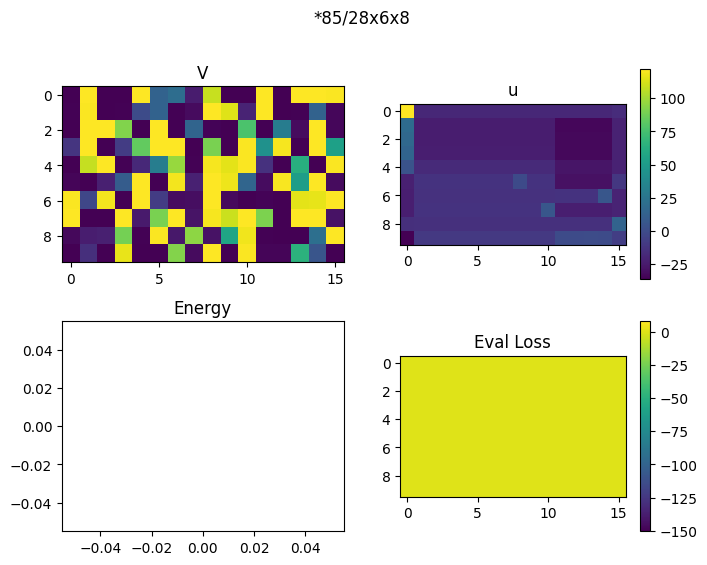

In [30]:
my_sr.plot_histories_as_video()